In [4]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation,BatchNormalization

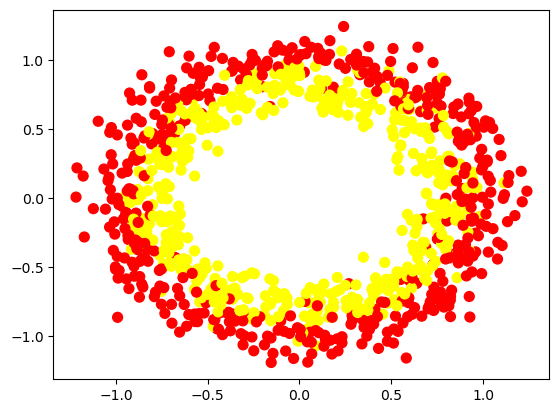

In [14]:
x,y=make_circles(n_samples=1000,noise=0.1,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')


In [15]:
n_train=500
trainX,testX=x[:n_train,:],x[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]


In [24]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
model.add(BatchNormalization())

#optimizer
optm=SGD(learning_rate=0.01,momentum=0.9)
#compiler
model.compile(loss='binary_crossentropy',optimizer=optm,metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                150       
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
 batch_normalization (Batch  (None, 1)                 4         
 Normalization)                                                  
                                                                 
Total params: 205 (820.00 Byte)
Trainable params: 203 (812.00 Byte)
Non-trainable params: 2 (8.00 Byte)
_________________________________________________________________


In [26]:
history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=100,verbose=2)


Epoch 1/100
16/16 - 1s - loss: 6.4013 - accuracy: 0.4860 - val_loss: 3.8247 - val_accuracy: 0.5520 - 1s/epoch - 81ms/step
Epoch 2/100
16/16 - 0s - loss: 5.3897 - accuracy: 0.5060 - val_loss: 5.6771 - val_accuracy: 0.5040 - 59ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 4.2478 - accuracy: 0.5120 - val_loss: 7.7742 - val_accuracy: 0.4960 - 59ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 5.5702 - accuracy: 0.4800 - val_loss: 7.7742 - val_accuracy: 0.4960 - 56ms/epoch - 3ms/step
Epoch 5/100
16/16 - 0s - loss: 5.8118 - accuracy: 0.4560 - val_loss: 7.7742 - val_accuracy: 0.4960 - 58ms/epoch - 4ms/step
Epoch 6/100
16/16 - 0s - loss: 7.4897 - accuracy: 0.5060 - val_loss: 7.7742 - val_accuracy: 0.4960 - 59ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 7.6508 - accuracy: 0.5040 - val_loss: 7.7742 - val_accuracy: 0.4960 - 55ms/epoch - 3ms/step
Epoch 8/100
16/16 - 0s - loss: 7.6508 - accuracy: 0.5040 - val_loss: 7.7742 - val_accuracy: 0.4960 - 57ms/epoch - 4ms/step
Epoch 9/100
16/16

In [21]:
_,train_acc=model.evaluate(trainX,trainy,verbose=1)
_,test_acc=model.evaluate(testX,testy,verbose=1)
print('Train Accuracy:\t',train_acc)
print()
print('Test Accuracy:\t',test_acc)


16/16 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8440
Train Accuracy:	 0.8420000076293945

Test Accuracy:	 0.843999981880188


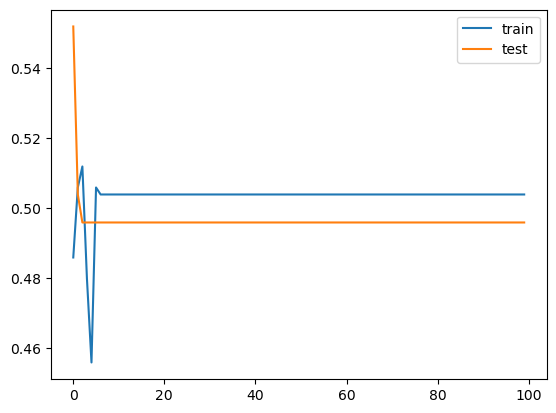

In [27]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

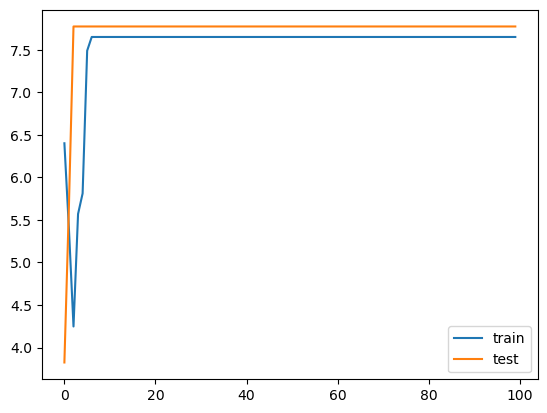

In [30]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()